## 3G2 Python Code

### Import Packages

In [1]:
import numpy as np # allows the use of arrays, and provides many useful functions
import matplotlib.pyplot as plt # plotting functionality
from scipy import integrate # numerical integration tool for ode's

### Physiological Parameters

In [2]:
p = dict(Pl=1500, M=0.45, K=250000, B=100, x01=0.1, dx0=0.01, tau=0.002)

### ODE Definition
Define the function $f$ on the right hand side of,
$$
\frac{d\mathbf{x}}{d t} = f(\mathbf x,t,p),
$$
where $\mathbf x$ is the vector of state variables, $t$ is time, and $p$ is a set of parameters that define $f$.

In [3]:
def f(x, t, p):
    x1, x2 = x[0], x[1]
    dx1 = x2
    dx2 = (- p['K']*x1 - p['B']*x2) / p['M']
    return([dx1,dx2])

### Solving Function
Create a function that will solve the equation $d\mathbf x/dt = f(\mathbf x,t,p)$ over the time interval $[0,T]$ given the initial condition $\mathbf x_0$ and the parameters $p$.

In [12]:
def run_oscil(x0,T,p):
    t = np.linspace(0, T, 1000)
    dxdt = lambda x,t : f(x, t, p)
    x_t = integrate.odeint(dxdt, x0, t)
    return(t,x_t)

Use this function to solve for $\mathbf x(t)$ given $\mathbf x_0$, $T$, and $p$.

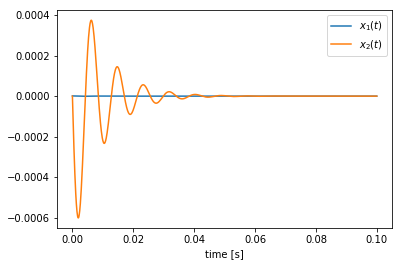

In [11]:
t, x = run_oscil([1e-6,0.0],0.1,p)
plt.plot(t,x)
plt.xlabel('time [s]')
plt.legend(['$x_1(t)$','$x_2(t)$']);